Importing Libraries

In [ ]:
import numpy as np 
import pandas as pd 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

Reading The Dataset

In [14]:
dataset = pd.read_csv('Corona_NLP_test.csv')
print(dataset)

      UserName  ScreenName             Location     TweetAt  \
0            1       44953                  NYC  02-03-2020   
1            2       44954          Seattle, WA  02-03-2020   
2            3       44955                  NaN  02-03-2020   
3            4       44956          Chicagoland  02-03-2020   
4            5       44957  Melbourne, Victoria  03-03-2020   
...        ...         ...                  ...         ...   
3793      3794       48746            Israel ??  16-03-2020   
3794      3795       48747       Farmington, NM  16-03-2020   
3795      3796       48748        Haverford, PA  16-03-2020   
3796      3797       48749                  NaN  16-03-2020   
3797      3798       48750  Arlington, Virginia  16-03-2020   

                                          OriginalTweet           Sentiment  
0     TRENDING: New Yorkers encounter empty supermar...  Extremely Negative  
1     When I couldn't find hand sanitizer at Fred Me...            Positive  
2     Fin

Checking For Null Values

In [15]:
dataset.isnull().sum()

UserName           0
ScreenName         0
Location         834
TweetAt            0
OriginalTweet      0
Sentiment          0
dtype: int64

We can either use simpleImputer on the whole data set using most_frequent value else we can use it on the individual columns

In [16]:
imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
imputer = imputer.fit(dataset)
dataset.iloc[:,:] = imputer.transform(dataset)

Checking The Results

In [17]:
dataset.isnull().sum()

UserName         0
ScreenName       0
Location         0
TweetAt          0
OriginalTweet    0
Sentiment        0
dtype: int64

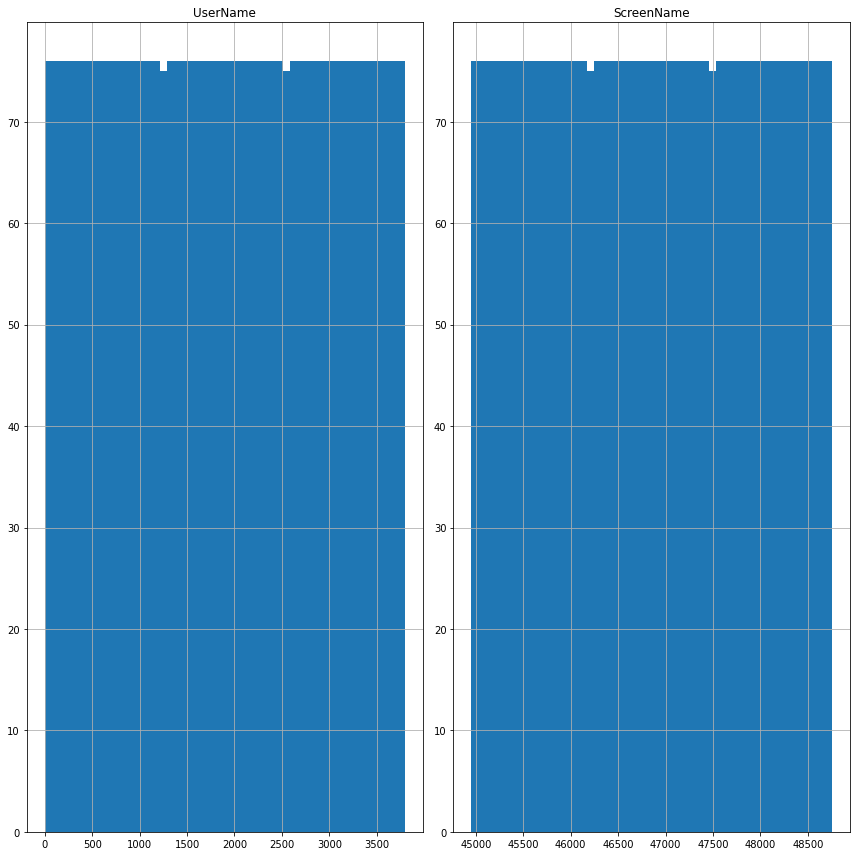

In [18]:
dataset.hist(figsize=(12,12),bins=50)
plt.tight_layout()

In [19]:
dataset.describe()

,UserName,ScreenName
count,3798.000000,3798.000000
mean,1899.500000,46851.500000
std,1096.532489,1096.532489
min,1.000000,44953.000000
25%,950.250000,45902.250000
50%,1899.500000,46851.500000
75%,2848.750000,47800.750000
max,3798.000000,48750.000000


Reading The Dataset

In [ ]:
dataset = pd.read_csv('camera_dataset.csv')
print(dataset)

                       Model  Release date  Max resolution  Low resolution  \
0           Agfa ePhoto 1280          1997          1024.0           640.0   
1           Agfa ePhoto 1680          1998          1280.0           640.0   
2           Agfa ePhoto CL18          2000           640.0             0.0   
3           Agfa ePhoto CL30          1999          1152.0           640.0   
4     Agfa ePhoto CL30 Clik!          1999          1152.0           640.0   
...                      ...           ...             ...             ...   
1033         Toshiba PDR-M65          2001          2048.0          1024.0   
1034         Toshiba PDR-M70          2000          2048.0          1024.0   
1035         Toshiba PDR-M71          2001          2048.0          1024.0   
1036         Toshiba PDR-M81          2001          2400.0          1200.0   
1037         Toshiba PDR-T10          2002          1600.0           800.0   

      Effective pixels  Zoom wide (W)  Zoom tele (T)  Normal fo

Checking For Null Values

In [ ]:
dataset.isnull().sum()

Model                      0
Release date               0
Max resolution             0
Low resolution             0
Effective pixels           0
Zoom wide (W)              0
Zoom tele (T)              0
Normal focus range         0
Macro focus range          1
Storage included           2
Weight (inc. batteries)    2
Dimensions                 2
Price                      0
dtype: int64

Filling Missing Values

In [ ]:
imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
imputer = imputer.fit(dataset[['Macro focus range','Storage included', 'Weight (inc. batteries)', 'Dimensions']])
dataset[['Macro focus range','Storage included', 'Weight (inc. batteries)', 'Dimensions']] = imputer.transform(dataset[['Macro focus range','Storage included', 'Weight (inc. batteries)', 'Dimensions']])

Checking The Results

In [ ]:
dataset.isnull().sum()

Model                      0
Release date               0
Max resolution             0
Low resolution             0
Effective pixels           0
Zoom wide (W)              0
Zoom tele (T)              0
Normal focus range         0
Macro focus range          0
Storage included           0
Weight (inc. batteries)    0
Dimensions                 0
Price                      0
dtype: int64

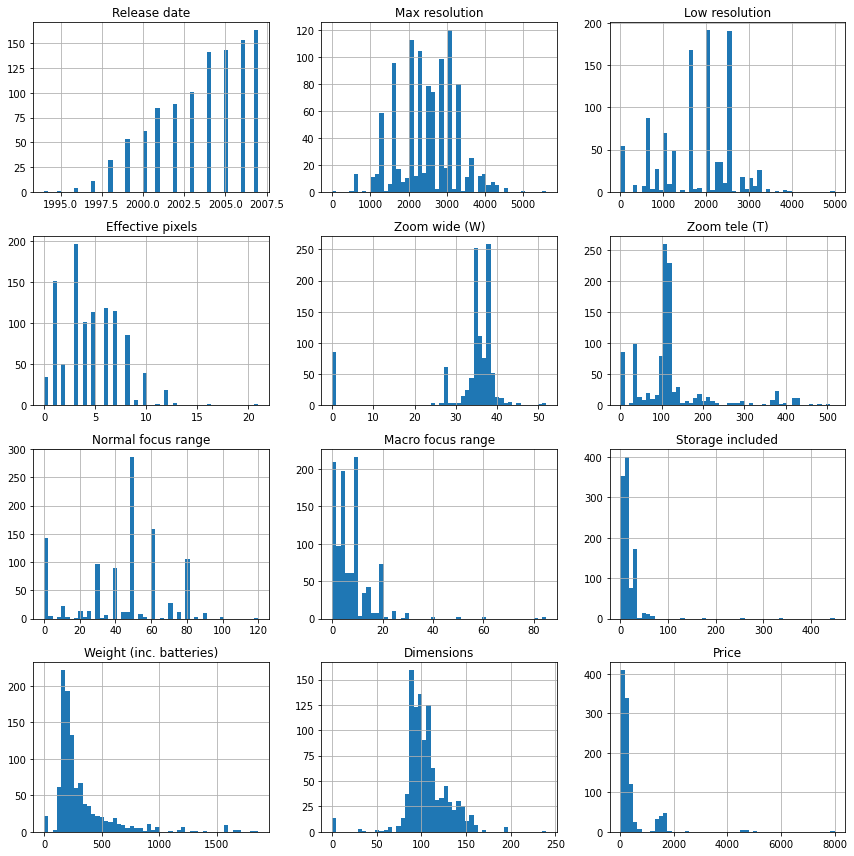

In [ ]:
dataset.hist(figsize=(12,12),bins=50)
plt.tight_layout()

In [ ]:
dataset.describe()

,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
count,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000
mean,2003.590559,2474.672447,1773.936416,4.596339,32.963391,121.525048,44.145472,7.787850,17.447876,319.265444,105.363417,457.384393
std,2.724755,759.513608,830.897955,2.844044,10.333149,93.455422,24.141959,8.096175,27.414181,260.158897,24.239353,760.452918
min,1994.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000
25%,2002.000000,2048.000000,1120.000000,3.000000,35.000000,96.000000,30.000000,3.000000,8.000000,180.000000,92.000000,149.000000
50%,2004.000000,2560.000000,2048.000000,4.000000,36.000000,108.000000,50.000000,6.000000,16.000000,226.500000,101.000000,199.000000
75%,2006.000000,3072.000000,2560.000000,7.000000,38.000000,117.000000,60.000000,10.000000,20.000000,347.500000,115.000000,399.000000
max,2007.000000,5616.000000,4992.000000,21.000000,52.000000,518.000000,120.000000,85.000000,450.000000,1860.000000,240.000000,7999.000000
